# Grundlagen Optimierung

## Grundbegriffe
Was ist eigentlich ein Optimierungsproblem? Bei einem Optimierungsproblem besteht die Aufgabe darin, einen Vektor $\v x$ zu suchen, so dass eine Funktion $f(\v x)$, also ein mathematischer Ausdruck, der von $\v x$ abhängt, *minimal* oder *maximal* wird. In der Mathematik gibt es eine standardisierte Form um Optimierungsprobleme zu spezifizieren.
````{prf:definition} Optimierungsproblem
Ein *Optimierungsproblem* ist ein Problem der Form
\begin{align*}
\min_{\v x\in D\in\R^n} f(\v x)
\end{align*}
Dabei nennen wir 
- $D\subseteq \R^n$ den *Definitionsbereich*,
- $f:\R^n\rightarrow \R$ die *Zielfunktion* (manchmal auch *Kostenfunktion*, speziell im maschinellen Lernen auch *Verlustfunktion*)
- den Vektor $x\in\R^n$ die *(Optimierungs-)Variablen* (im Kontext des maschinellen Lernens oft auch *Parameter*, *Koeffizienten* oder *Gewichte*)
````
Wir nehmen in dieser Vorlesung an, dass $f$ *stetig differenzierbar* ist. Dies ist in der Praxis, gerade im Bereich des maschinellen Lernens, nicht immer erfüllt, soll uns aber hier nicht weiter stören. Weiterhin möchten wir annehmen, dass es bei der Wahl des Vektors $\v x$ keine Einschränkungen gibt, d.h. der Bereich $D$, in dem wir nach einer Lösung suchen, soll der gesamte $\R^n$ sein.  

````{note} Minimierung vs. Maximierung
Per Konvention schauen wir uns nur Minimierungsprobleme an, d.h. eine Funktion soll so *klein* wie möglich sein. Haben wir es doch einmal mit einem Maximierungsproblem zu tun, also $\max_{\v x\in D\in\R^n} f(\v x)$, so können wir genausogut das Minimierungsproblem $\min_{\v x\in D\in\R^n} -f(\v x)$ betrachten.
````

Wir haben nun schon von einer *Lösung* des Problems gesprochen, ohne präzise zu sagen, was das überhaupt sein soll. Man unterscheidet dabei zwischen lokalen und globalen Lösungen. Hier die Definitionen:
````{prf:definition} Globale und lokale Minima
:label: def:minmax

Ein Punkt $\v x^{\star}\in D$ heißt *globales Minimum* von $f$ oder *globale Lösung* des Minimierungsproblems, falls $f(\v x)\geq f(\v x^{\star})$ für *jeden* Vektor $\v x\in \R^n$.

Ein Punkt $\v x^{\star}\in D$ heißt *lokales  Minimum* von $f$ oder *lokale Lösung* des Minimierungsproblems, falls $f(\v x)\geq f(\v x^{\star})$ für *jeden* Vektor $\v x$ in einer Umgebung von $\v x^{\star}$. 

Wenn ein Minimierungsproblem keine globale Lösung besitzt, nennt man es *unbeschränkt*.
````
Wie groß diese "Umgebung" ist, ist nicht weiter spezifiziert. Die Aussage bedeutet lediglich, dass es eine solche gibt. Mathematisch exakter kann man das auch so formulieren:
Wir definieren für eine Zahl $\varepsilon>0$ die Menge $U_{\varepsilon}(\v x^{\star})$ als Kugel mit Radius $\varepsilon$ um $\v x^{\star}$, formell $U_{\varepsilon}(\v x^{\star})=\{\v x\in\R^n :\ \norm{\v x^{\star}}-\v x\}<\varepsilon \}$. Ein Vektor $\v x^{\star}$ ist ein lokales Minimum, wenn es eine Zahl $\varepsilon>0$ gibt, so dass $f(\v x)\geq f(\v x^{\star})$ für *jeden* Vektor $\v x\in U_{\varepsilon}$

````{prf:example} Lokale und globale Minima
Die folgenden Beispiele zeigen, dass eine Funktion weder lokale noch globale Minima haben muss. Wenn es welche gibt, kann es auch sein, dass es mehrere gibt. 

Kein Minimum (unbeschränktes Problem)
: $f(x)=x$
```{figure} ./bilder/minima3.png
:width: 400px
```

Ein lokales Minimum, das gleichzeitig das globale Minimum ist
: $f(x)=x^2$
```{figure} ./bilder/minima5.png
:width: 400px
```

Ein lokales und ein globales Minimum
: $f(x)=\frac{1}{4}x^4-\frac{1}{3}x^3-x^2+2$
```{figure} ./bilder/minima4.png
:width: 400px
```

Unendliche viele globale (und lokale) Minima 
: $f(x)=\sin(x)$
```{figure} ./bilder/minima2.png
:width: 400px
```

Unendliche viele lokale Minima, kein globales Minimum (unbeschränktes Problem)
: $f(x)=\sin(x) + 0.3x$
```{figure} ./bilder/minima1.png
:width: 400px
```

Unendliche viele lokale Minima, ein globales Minimum
: $f(x)=\sin(x)+ 0.3|x|$
```{figure} ./bilder/minima6.png
:width: 400px
```

````

Nachdem wir nun die Grundbegriffe der Optimierung kennen, wenden wir uns als nächstes den Optimalitätsbedingungen und der Grundidee der Gradientenverfahren zu. Wir schauen uns alle Konzepte zunächst im univariaten, d.h. eindimensionalen Fall an, da dieser leichter zu verstehen ist. 
Danach wiederholen wir das Ganze für den allgemeinen multivariaten Fall (d.h. Vektoren statt Zahlen). Ich hoffe, dass man dadurch viele Parallelen zum (anschaulichen) eindimensionalen Fall erkennt und dass der mehrdimensionale Fall dadurch etwas eingängiger ist.


## Gradientenabstieg für univariate Funktionen
Kehren wir zurück zu unserer ursprünglichen Aufgabe: wir möchten das Minimierungsproblem
\begin{align*}
\min_{x\in\R} f(x)
\end{align*}
für eine beliebige differenzierbare Funktion $f$ lösen. In der Analysis gibt es dafür gewisse Bedingungen an die Ableitungen, die man in speziellen Fällen algebraisch auflösen kann (das, was man in der Schule unter dem Begriff "Kurvendiskussion" kennenlernt). Allerdings funktioniert das in der Mehrzahl der praktisch relevanten Fälle nicht, d.h. Gleichungen lassen sich nicht per Hand auflösen.

In der Praxis bedient man sich stattdessen sogenannter *Abstiegsverfahren*, um ein Minimum zu approximieren. Man nähert sich einem Minimum an, indem man eine Folge von Punkten konstruiert, bei denen man sicherstellt, dass der Funktionswert immer kleiner wird. Der prototypische Vertreter dieser Abstiegsverfahren ist der *Gradientenabstieg*, auch genannt Verfahren des steilsten Abstiegs/steepest descen oder gradient descent.
Wir schauen uns zunächst die Grundform dieses Algorithmus an, der uns dieses Semester an vielen Stellen begegnen wird. Zur Notation: hier und im Rest der Vorlesung indizieren wir die Iteration mit einem Superskript in eckigen Klammern: $^{[k]}$. Jede Größe (Skalar, Vektor, Matrix), an der Sie ein $^{[k]}$ sehen, kann sich von Iteration zu Iteration ändern. $x^{[k]}$ bezeichnet also den Wert $x$ während der Iteration $k$.

````{prf:algorithm} Gradientenabstieg für univariate Funktionen
Gegeben: 
: Differenzierbare Funktion $f:\R\rightarrow\R$.
: Folge von Schrittweiten $\alpha^{[k]}$, für $k=0,1,2,\dots$.
: Initialer Schätzwert für die Lösung $x^{[0]}$.

Gesucht: 
: Lokales Minimum von $f$.

**Algorithmus**:
1. Starte mit initialer Schätzung $x^{[0]}$.
2. Für $k=0,1,2,\dots$:
    - Berechne neue Iterierte $x^{[k+1]}=x^{[k]}-\alpha^{[k]}f'(x^{[k]})$.
    - Falls Abbruchbedingung erfüllt, beende Algorithmus mit Lösung $x^{[k+1]}$.
````
Hier ergeben sich sofort zwei Fragen:
1. Wie wählt man die Folge von Schrittweiten $\alpha^{[k]}$?
2. Was ist die Abbruchbedingung?

Bevor wir uns diesen widmen, schauen wir uns ein Beispiel für den Gradientenabstieg an, um zu verstehen, wie die Iteration funktioniert.

Ziel ist es, das Minimum der Funktion $f(x)=x^2\ln(x)+x-1$ zu bestimmen:
```{figure} ./bilder/gd_beispiel.png
:width: 400px
```
Das globale Minimum liegt bei $x^*=1$ mit dem Funktionswert $f(x)=-1$. Im Minimum hat die Ableitung $f'(x)=2x\ln(x)+x-1$ eine Nullstelle, d.h. $f'(1)=0$.

Der Einfachheit halber wählen wir die Schrittweite $\alpha^{[k]}$ konstant $\alpha^{[k]}=0.1$ in jeder Iteration $k$. Als Startwert für die Iterationen wählen wir $x^{[0]}=2$. Die Berechnung der Iterationen funktioniert wie folgt:

| $k$       | $x^{[k]}$ |
|:---       |:---       |
| $0$       | $2$       |
| $1$       | $2-0.1\cdot f'(2)=1.62$       |
| $2$       | $1.62-0.1\cdot f'(1.62)=1.40$       |
| $3$       | $1.40-0.1\cdot f'(1.40)=1.26$       |
| $\vdots$       | $\vdots$       |
| $15$       | $1.003$       |

In diesem Beispiel ist man nach $15$ Iterationen schon recht nah an der Lösung $x^*=1$. Auch klar: Wenn man einen anderen Startwert oder eine andere Schrittweite wählt, erhält man eine andere Folge von Iterationen. Hier ein Beispiel mit $\alpha^{[k]}=0.5$:

| $k$       | $x^{[k]}$ |
|:---       |:---       |
| $0$       | $2$       |
| $1$       | $2-0.5\cdot f'(2)=0.11$       |
| $2$       | $0.11-0.5\cdot f'(0.11)=0.8$       |
| $3$       | $0.8-0.1\cdot f'(0.8)=1.07$       |
| $\vdots$       | $\vdots$       |
| $9$       | $1.001$       |

Beobachtung: Wenn wir die Schrittweite vergrößern, machen wir schneller Fortschritte in Richtung der Lösung. Nach 9 Iterationen beträgt die Differenz zur (normalerweise unbekannten) optimalen Lösung nur noch $0.001$.

In folgendem Code ist ein einfaches Gradientenverfahren implementiert, das ein Minimum der Funktion $f(x)=x^2\ln(x)+x-1$ sucht. Die Historie der $x^{[k]}$-Werte zurückgegeben und visualisiert.

<Axes: >

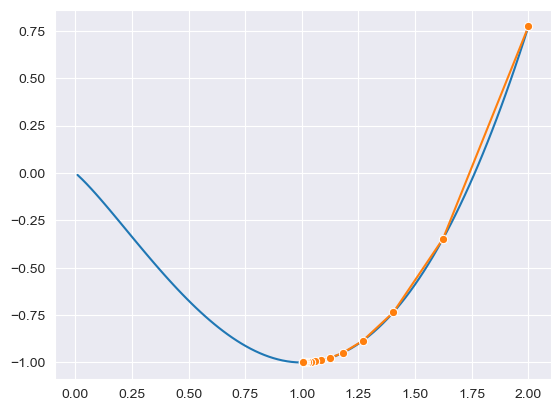

In [1]:
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

def f(x):
    """ Function to minimize """
    return x**2*np.log(x)-x

def df(x):
    """ Derivative of the function to minimize """
    return 2*x*np.log(x)+x-1

def gd(func, derv, alpha, x0, n_steps):
    """ Perform n_steps iterations of gradient descent with steplength alpha and print iterates """
    x_history = [x0]
    x = x0
    for k in range(n_steps):
        x = x - alpha * derv(x)
        x_history.append(x)

    return np.array(x_history)

x_history = gd(func=f, derv=df, alpha=0.1, x0=2.0, n_steps=15)

x = np.linspace(0.01,2,100)
sns.lineplot(x=x,y=f(x))
sns.lineplot(x=x_history, y=f(x_history), marker="o", sort=False)

## Gradientenabstieg für multivariate Funktionen
Wir betrachten nun allgemeine, mehrdimensionale Optimierungsprobleme der Form
\begin{align*}
\min_{\v x\in D\in\R^n} f(\v x)
\end{align*}
mit einer differenzierbaren Funktion $f:\R^n\rightarrow \R$. Der erste Unterschied zum eindimensionalen Fall, der ins Auge fällt, ist, dass die ersten Ableitungen Vektoren sind, die zweiten Ableitungen (Hesse-)Matrizen. Man muss also genau aufpassen, welche Summen und Produkte überhaupt definiert sind. 

Mit Blick auf das Gradientenverfahren gibt es außerdem nicht mehr nur zwei Richtungen ("links und rechts"), in denen man nach einem Abstieg der Funktion suchen kann, sondern unendlich viele: Man stelle sich vor, man stehe in der $\R^2$-Ebene an einem bestimmten Punkt und blickt in eine Richtung. Jeder Winkel (reelle Zahl) zwischen $0$ und $360°$ definiert einen eigenen Richtungsvektor in der Ebene. 

Die Idee des Gradientenverfahrens ist es, von einem Punkt ein kleines Stück in die Richtung des (lokal) steilsten Abstiegs zu gehen. Diese Richtung ist gerade durch den Gradienten an der Stelle gegeben. Wenn der Schritt nicht zu groß ist, erwartet man, dass man damit ein Stück "bergab" geht, dass der Funktionswert also kleiner wird. Führt man dies iterativ immer wieder aus, so erwartet man, dass man irgendwann "unten ankommt", d.h. an einem lokalen Minimum (unter gewissen Bedingungen trifft das auch zu).

Formal können wir den Gradientenabstieg analog zum eindimensionalen Fall beschreiben. Dafür müssen wir lediglich die Ableitung $f'$ durch ihre mehrdimensionale Verallgemeinerung, den Gradienten $\nabla f$, ersetzen, außerdem werden aus Zahlen $x$ Vektoren $\v x$.

Die Grundform des Verfahrens ist wie folgt:
````{prf:algorithm} Gradientenabstieg für multivariate Funktionen
:label: alg:gd
Gegeben: 
: Differenzierbare Funktion $f:\R^n\rightarrow\R$.
: Folge von Schrittweiten $\alpha^{[k]}$, für $k=0,1,2,\dots$.
: Initialer Schätzwert für die Lösung $\v x^{[0]}$.

Gesucht: 
: Lokales Minimum von $f$.

**Algorithmus**:
1. Starte mit initialer Schätzung $\v x^{[0]}$.
2. Für $k=0,1,2,\dots$:
    - Berechne neue Iterierte $\v x^{[k+1]}=x^{[k]}-\alpha^{[k]}\nabla f(\v x^{[k]})$, $\alpha^{[k]}>0$.
    - Falls Abbruchbedingung erfüllt, beende Algorithmus mit Lösung $\v x^{[k+1]}$.
````

````{prf:example} Beispiel Gradientenabstieg
TODO
````

Um ein Verfahren zu erhalten, das in der Praxis funktioniert, müssen einige Dinge beachtet werden, insbesondere:
- Wie wird die Folge von Schrittweiten gewählt?
- Wann soll das Verfahren abbrechen?
- Was kann schiefgehen?

Diesen Fragen werden wir uns in der Vorlesung "Optimierungsverfahren, Modellierung und Simulation" intensiv widmen.